In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from fastai import *
from fastai.vision import *

Using TensorFlow backend.


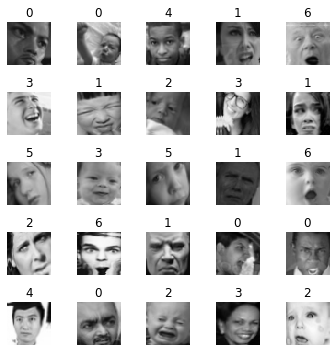

In [2]:
path = datapath4file('resampled_random_db')
tfms = get_transforms()
data = (ImageList.from_folder(path)
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_folder()
        .transform(tfms, size=48)
        .databunch()).normalize(imagenet_stats)
data.show_batch(row=3, figsize=(5,5))

In [3]:
data.train_ds

LabelList (50339 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
3,3,3,3,3
Path: /home/jupyter/.fastai/data/resampled_random_db

In [4]:
data.valid_ds

LabelList (12584 items)
x: ImageList
Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48),Image (3, 48, 48)
y: CategoryList
2,1,4,2,5
Path: /home/jupyter/.fastai/data/resampled_random_db

In [5]:
names_train = []
shapes_train = []
anger, happiness, sadness, neutral, disgust, fear, surprise = 0, 0, 0, 0, 0, 0, 0


for i in data.train_ds:
    # get the Image tensor to numpy array
    my_tensor = i[0].data.cpu().detach().numpy()
    # get batch, line, cols of the array
    batch, line, cols = my_tensor.shape
    # reshape
    to_be_used_in_resample = my_tensor.reshape(1,-1)
    # append the reshaped numpy array 
    shapes_train.append(to_be_used_in_resample)
    names_train.append(int(str(i[1])[-1]))
    if str(i[1]).endswith('0'):
        anger += 1
    if str(i[1]).endswith('1'):
        disgust += 1
    if str(i[1]).endswith('2'):
        fear += 1
    if str(i[1]).endswith('3'):
        happiness  += 1
    if str(i[1]).endswith('4'):
        neutral += 1
    if str(i[1]).endswith('5'):
        sadness += 1
    if str(i[1]).endswith('6'):
        surprise += 1


print('TRAIN SET')        
print('anger: ' + str(anger))
print('disgust: ' + str(disgust))
print('fear: ' + str(fear))
print('happiness: ' + str(happiness))
print('neutral: ' + str(neutral))
print('sadness: ' + str(sadness))
print('surprise: ' + str(surprise))

TRAIN SET
anger: 7166
disgust: 7233
fear: 7143
happiness: 7241
neutral: 7195
sadness: 7176
surprise: 7185


In [6]:
names_valid = []
shapes_valid = []
anger, happiness, sadness, neutral, disgust, fear, surprise = 0, 0, 0, 0, 0, 0, 0


for i in data.valid_ds:
    # get the Image tensor to numpy array
    my_tensor = i[0].data.cpu().detach().numpy()
    # get batch, line, cols of the array
    batch, line, cols = my_tensor.shape
    # reshape
    to_be_used_in_resample = my_tensor.reshape(1,-1)
    # append the reshaped numpy array 
    shapes_valid.append(to_be_used_in_resample)
    names_valid.append(int(str(i[1])[-1]))
    if str(i[1]).endswith('0'):
        anger += 1
    if str(i[1]).endswith('1'):
        disgust += 1
    if str(i[1]).endswith('2'):
        fear += 1
    if str(i[1]).endswith('3'):
        happiness  += 1
    if str(i[1]).endswith('4'):
        neutral += 1
    if str(i[1]).endswith('5'):
        sadness += 1
    if str(i[1]).endswith('6'):
        surprise += 1


print('VALID SET')        
print('anger: ' + str(anger))
print('disgust: ' + str(disgust))
print('fear: ' + str(fear))
print('happiness: ' + str(happiness))
print('neutral: ' + str(neutral))
print('sadness: ' + str(sadness))
print('surprise: ' + str(surprise))

VALID SET
anger: 1823
disgust: 1756
fear: 1846
happiness: 1748
neutral: 1794
sadness: 1813
surprise: 1804


In [67]:
x_train = np.concatenate(shapes_train)
x_test = np.concatenate(shapes_valid)

In [68]:
y_train = names_train
y_test = names_valid

In [69]:
batch_size = 32
num_classes = 7
epochs = 12

# input image dimensions
img_rows, img_cols = 48, 48

# the data, split between train and test sets


x_train = x_train.reshape(50339,48,48,3)
x_test = x_test.reshape(12584,48,48,3)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50339, 48, 48, 3)
50339 train samples
12584 test samples


In [70]:
y_train.shape

(50339, 7)

In [71]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(48,48,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [72]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50339 samples, validate on 12584 samples
Epoch 1/12
50339/50339 [==============================] - 54s 1ms/step - loss: 1.8279 - accuracy: 0.2648 - val_loss: 1.6938 - val_accuracy: 0.3413
Epoch 2/12
50339/50339 [==============================] - 54s 1ms/step - loss: 1.6613 - accuracy: 0.3614 - val_loss: 1.5248 - val_accuracy: 0.4136
Epoch 3/12
50339/50339 [==============================] - 54s 1ms/step - loss: 1.5519 - accuracy: 0.4090 - val_loss: 1.5245 - val_accuracy: 0.4303
Epoch 4/12
50339/50339 [==============================] - 54s 1ms/step - loss: 1.4703 - accuracy: 0.4462 - val_loss: 1.4346 - val_accuracy: 0.4630
Epoch 5/12
50339/50339 [==============================] - 53s 1ms/step - loss: 1.4038 - accuracy: 0.4730 - val_loss: 1.3638 - val_accuracy: 0.4873
Epoch 6/12
50339/50339 [==============================] - 54s 1ms/step - loss: 1.3454 - accuracy: 0.4981 - val_loss: 1.4256 - val_accuracy: 0.4694
Epoch 7/12
50339/50339 [==============================] - 53s 1ms/st